## K Means Clustering of Iris Dataset

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


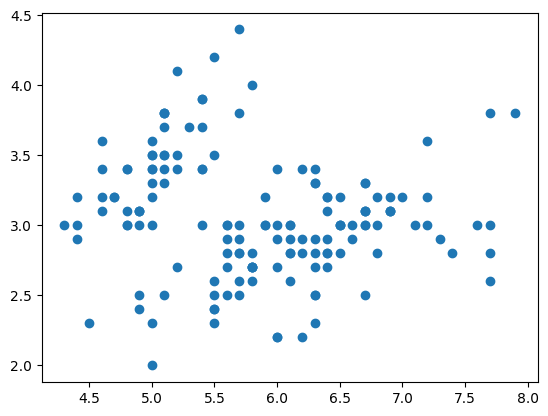

In [155]:
# 5.1,3.5,1.4,0.2,Iris-setosa

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    data = pd.read_csv(filename, header=None)
    return data

def plot_data(data):
    plt.scatter(data[:,0], data[:,1])
    plt.show()


iris_dataset = read_data("./iris/iris.data")
iris_dataset

iris_dataset.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
print(iris_dataset.head())

iris_dataset['class'].unique()
plot_data(iris_dataset.values)



In [156]:

def kmeans(data, k):
    """
    Perform k-means clustering on the given data.

    Parameters:
    - data: The input data to be clustered.
    - k: The number of clusters to create.

    Returns:
    - centroids: The final centroids of the clusters.
    - clusters: The cluster assignments for each data point.
    """
    centroids = data.sample(k)
    centroids = centroids.values
    # To store the value of centroids when it updates
    centroids_old = np.zeros(centroids.shape)
    # Cluster labels (either 0, 1, or 2)
    clusters = np.zeros(len(data))

    # Euclidean distance between the current centroids and the old centroids
    error = np.linalg.norm(centroids - centroids_old)
    while error != 0:
        for i in range(len(data)):

            # Assign each value to its closest cluster
            distances = np.linalg.norm(data.values[i] - centroids, axis=1)

            # Get the index of the closest centroid to the sample
            cluster = np.argmin(distances)
            clusters[i] = cluster

        # Store the old centroid values
        centroids_old = centroids.copy()
        for i in range(k):
            # Get all the points assigned to a cluster
            points = [data.values[j] for j in range(len(data)) if clusters[j] == i]

            # Calculate the mean of the points in each cluster
            centroids[i] = np.mean(points, axis=0)
        
        # Calculate the distance between the old and new centroids
        error = np.linalg.norm(centroids - centroids_old)
    return centroids, clusters


def print_clusters(centroids, clusters):
    print("Centroids:")
    print(centroids.round(1))
    print("Clusters:")
    #group them by cluster
    for i in range(len(centroids)):
        print("Cluster {}: \n {}".format(i, np.where(clusters == i)[0]))
        

### For k = 2

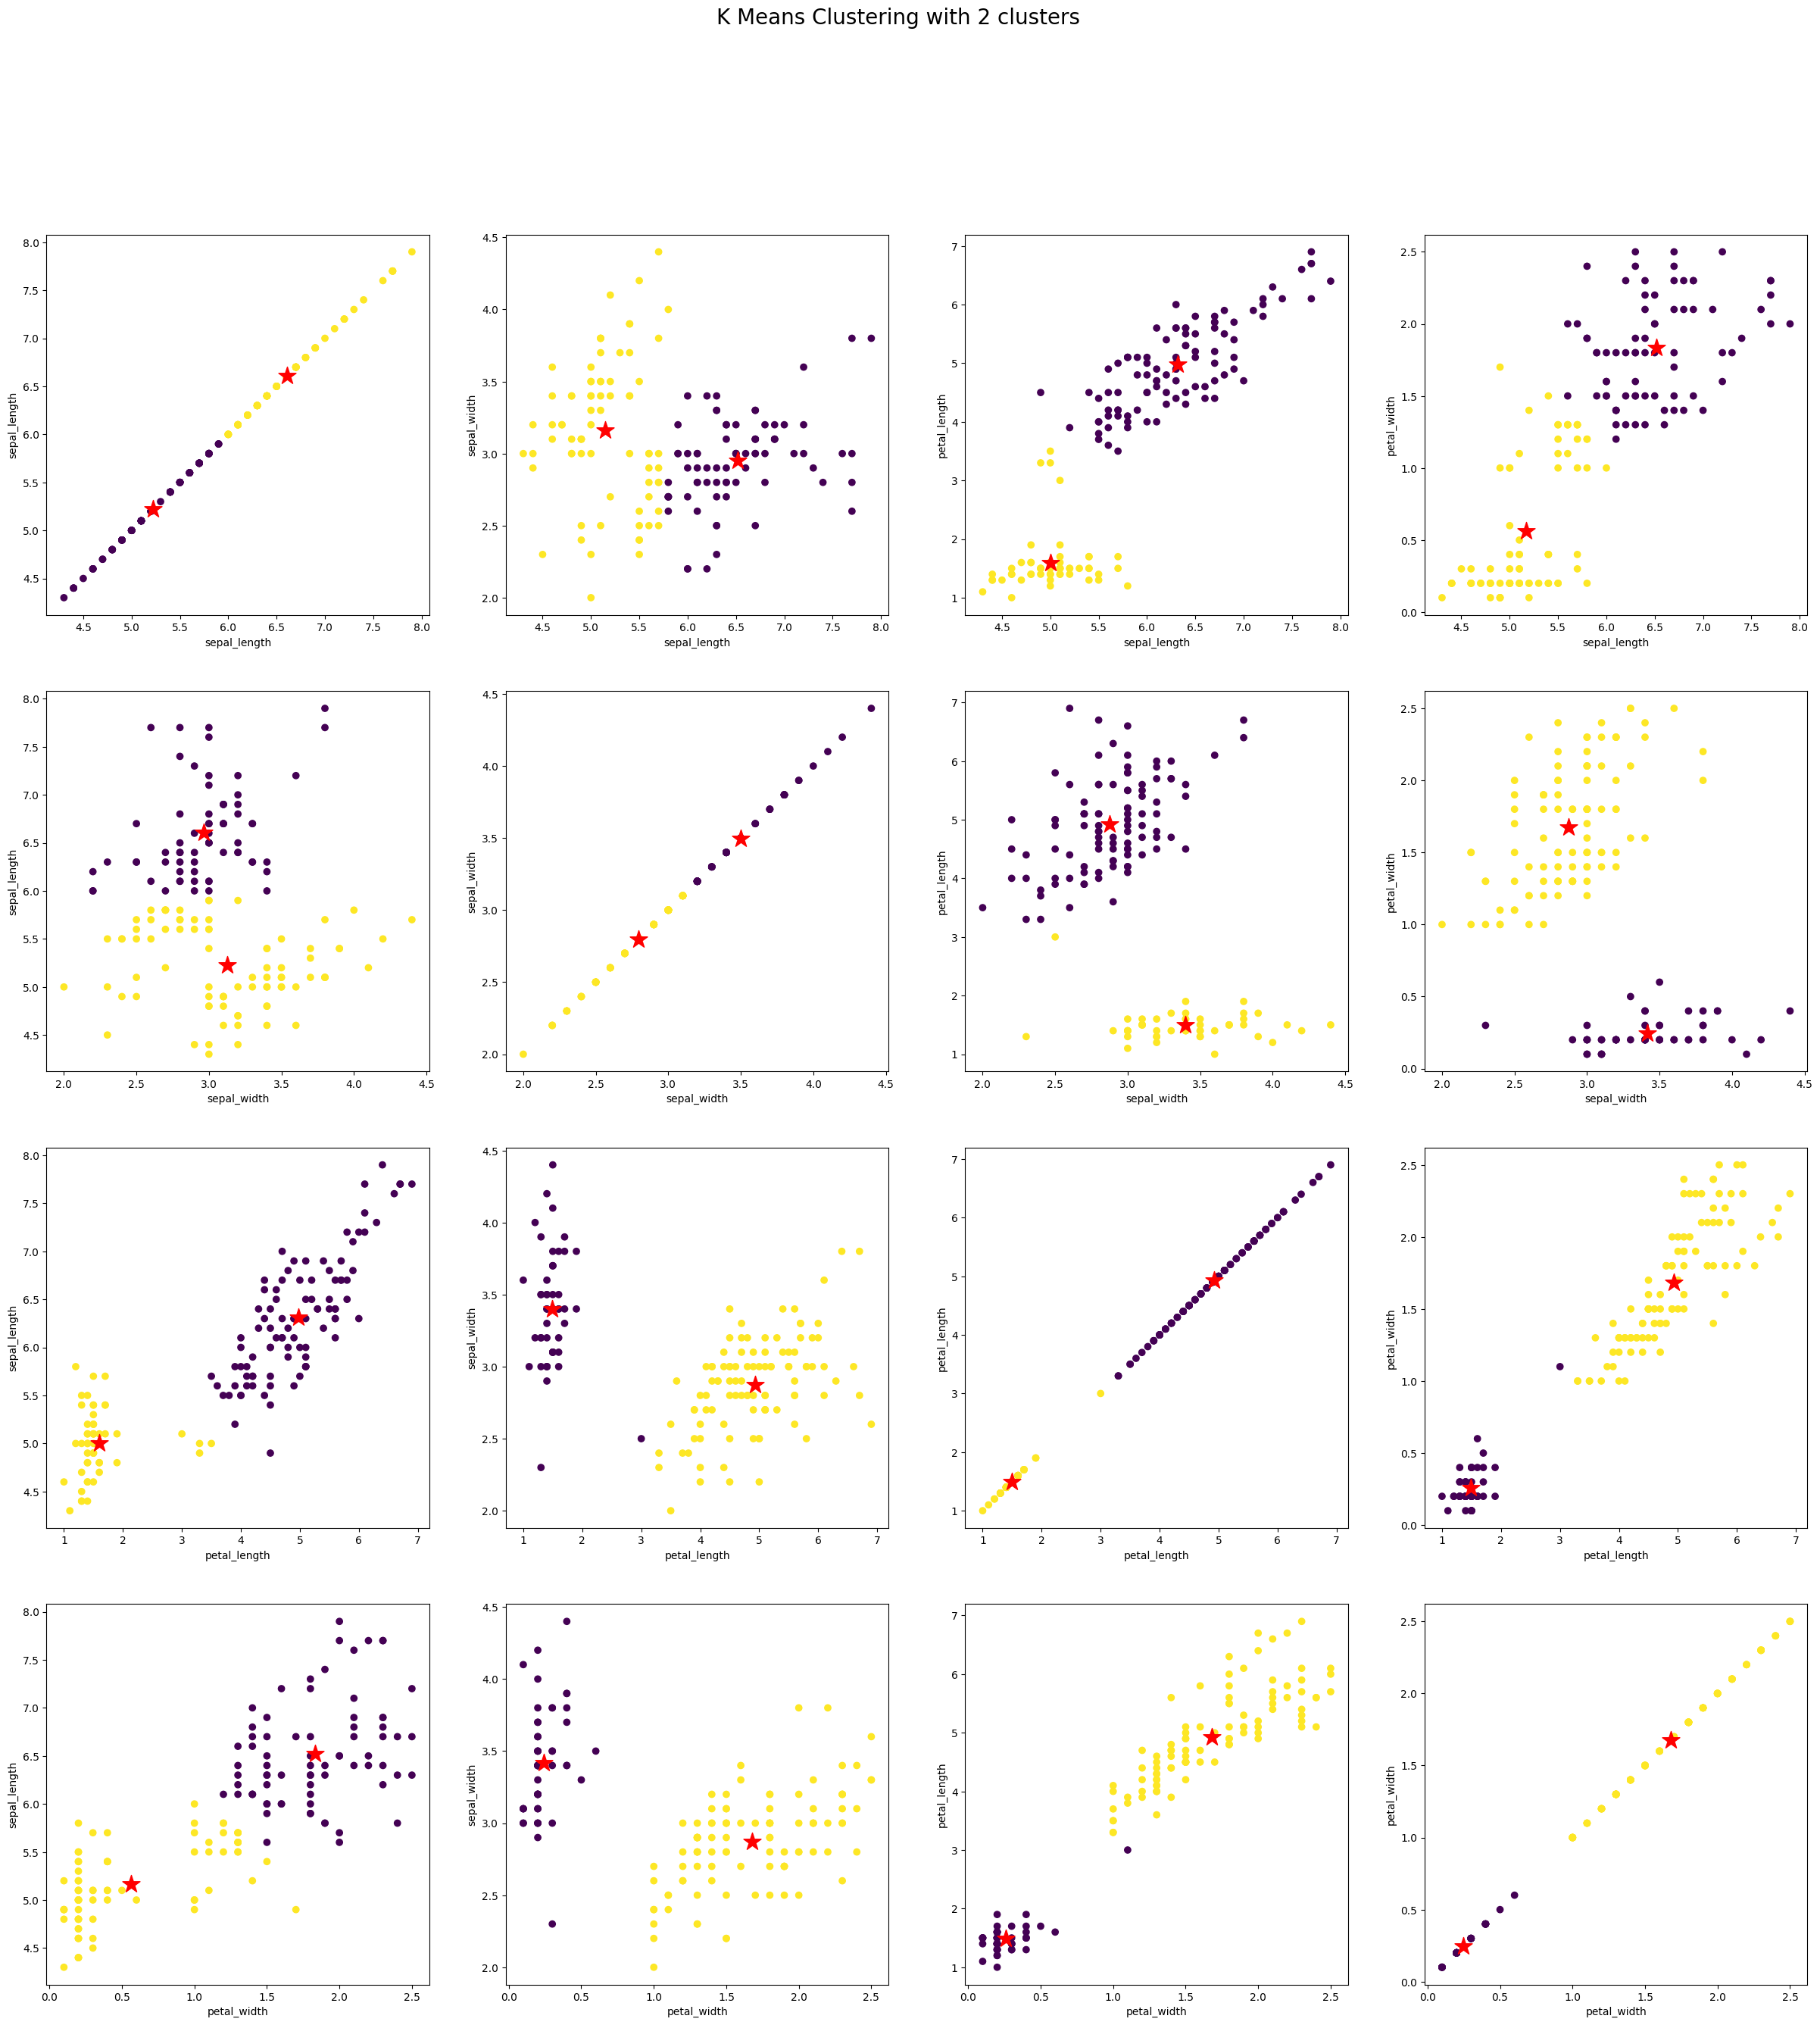

In [157]:
# centroids, clusters = kmeans(iris_dataset[['sepal_length', 'sepal_width']], 2)

# print_clusters(centroids, clusters)

# plt.scatter(iris_dataset['sepal_length'], iris_dataset['sepal_width'], c=clusters)
# plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=300, c='red')
# plt.show()

fig = plt.figure()


#increase the size of the figure
fig.set_figheight(30)
fig.set_figwidth(30)


#title
fig.suptitle("K Means Clustering with 2 clusters", fontsize=20)
#plot all possible combinations of features 4c2 = 6 taking 2 at a time
for i in range(4):
    for j in range(4):
            plt.subplot(4, 4, i*4+j+1)
            centroids, clusters = kmeans(iris_dataset.iloc[:, [i, j]], 2)
            plt.scatter(iris_dataset.iloc[:, i], iris_dataset.iloc[:, j], c=clusters)
            plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=300, c='red')
            plt.xlabel(iris_dataset.columns[i])
            plt.ylabel(iris_dataset.columns[j])
plt.show()


### For k = 3

Centroids:
[[6.3 2.9 5.  1.7]
 [4.7 3.1 1.4 0.2]
 [5.2 3.5 1.7 0.4]]
Clusters:
Cluster 0: 
 [ 50  51  52  53  54  55  56  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  94  95  96  97  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149]
Cluster 1: 
 [ 1  2  3  6  8  9 11 12 13 22 25 29 30 34 35 37 38 41 42 45 47 49]
Cluster 2: 
 [ 0  4  5  7 10 14 15 16 17 18 19 20 21 23 24 26 27 28 31 32 33 36 39 40
 43 44 46 48 57 93 98]


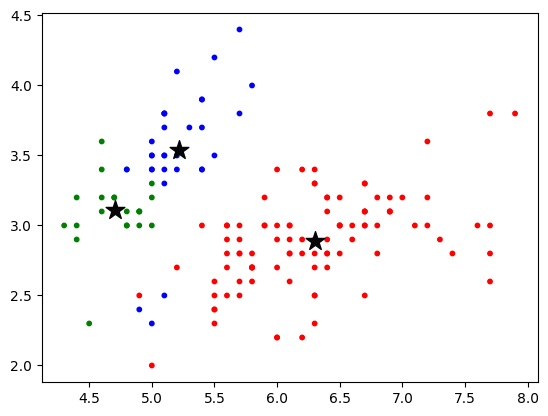

In [158]:
centroids, clusters = kmeans(iris_dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 3)
colors = ['r', 'g', 'b']

print_clusters(centroids, clusters)

plt.scatter(iris_dataset['sepal_length'], iris_dataset['sepal_width'], c=[colors[int(cluster)] for cluster in clusters], s=10)
#add centroids to the plot
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=200, c='#050505')

plt.show()



Centroids:
[[5.  3.4 1.5]
 [6.8 3.1 5.7]
 [5.8 2.7 4.4]]
Clusters:
Cluster 0: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Cluster 1: 
 [ 50  52  76  77  86 100 102 103 104 105 107 108 109 110 111 112 115 116
 117 118 120 122 124 125 128 129 130 131 132 133 134 135 136 137 139 140
 141 143 144 145 147 148]
Cluster 2: 
 [ 51  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  78  79  80  81  82  83  84  85  87  88  89  90
  91  92  93  94  95  96  97  98  99 101 106 113 114 119 121 123 126 127
 138 142 146 149]


<Figure size 1000x1000 with 0 Axes>

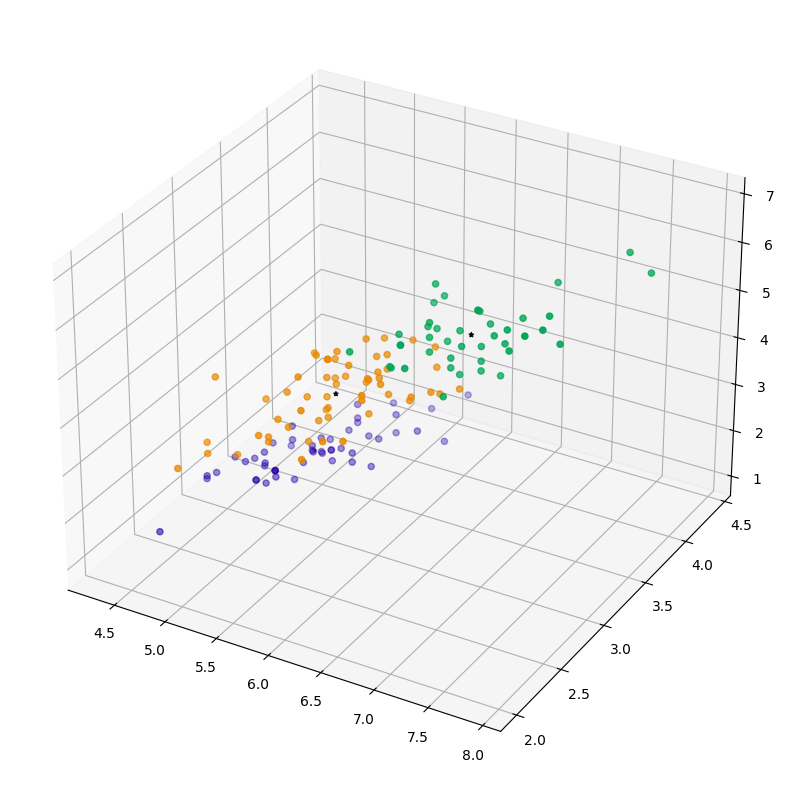

In [159]:
# add colors to the clsuters (red, green, blue)
# 3d plot
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))

# add colors to the clusters (red, green, blue)
colors = ['#2300A8', '#00A658', '#E88800']

centroids, clusters = kmeans(iris_dataset[['sepal_length', 'sepal_width', 'petal_length']], 3)

print_clusters(centroids, clusters)

# 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# scatter plot with custom colors
ax.scatter(iris_dataset['sepal_length'], iris_dataset['sepal_width'], iris_dataset['petal_length'], c=[colors[int(cluster)] for cluster in clusters], s=20)
# add centroids to the plot
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='#050505', s=10)
plt.show()

### For k = 4

In [160]:
import plotly.express as px
#use color weight to represent 4th dimension
fig = px.scatter_3d(iris_dataset, x='sepal_length', y='sepal_width', z='petal_length',
             size='petal_width', color='class', opacity=0.7)

#plot the centroids
fig.add_scatter3d(x=centroids[:,0], y=centroids[:,1], z=centroids[:,2], mode='markers', marker=dict(color='#050505', size=5,))

fig.show()

